## Discretization with k-means clustering



This discretization method consists of applying k-means clustering to the continuous variable.

Briefly, the algorithm works as follows:

- 1) Initialization: random creation of K centers
- 2) Each data point is associated with the closest center
- 3) Each center position is re-computed as the center of its associated points

Steps 2 and 3 are repeated until convergence is reached. The algorithm minimizes the pairwise squared deviations of points within the same cluster.

More details about k-means are [here](https://en.wikipedia.org/wiki/K-means_clustering)

Nice blog with graphical explanation of k-means [here](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0) 

Note that the user needs to define the number of clusters.

## Titanic dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [13]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('../../Datasets/titanic.csv',
                   usecols=['age', 'fare', 'survived'])

#using age and fare columns only
# survived is the target variable

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [14]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

The variables Age and Fare contain missing data, that I will fill by extracting a random sample of the variable.

In [15]:
def impute_na(data, variable):# function to fill NA with a random sample

    
    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [16]:
# replace NA in both train and test sets

X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')

X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

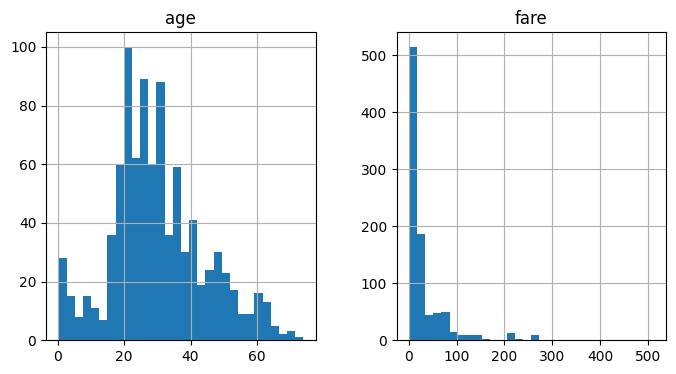

In [17]:
# let's explore the distribution of age

X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

## Discretisation with k-means

In [18]:
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans', subsample=None)
# we want 4 clusters, and use kmeans strategy
# cluster 1 is 0.0, cluster 2 is 1.0, cluster 3 is 2.0, cluster 4 is 3.0

disc.set_output(transform="pandas")

disc.fit(X_train[['age', 'fare']])

c:\Users\shahr\anaconda3\envs\Q1_try\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\shahr\anaconda3\envs\Q1_try\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,n_bins,4
,encode,'ordinal'
,strategy,'kmeans'
,quantile_method,'warn'
,dtype,None
,subsample,None
,random_state,None


In [19]:
disc.bin_edges_

array([array([ 0.1667    , 19.35059866, 34.06303553, 50.22640292, 74.        ]),
       array([  0.        ,  48.38317511, 155.62486898, 371.03119259,
              512.3292    ])                                         ],
      dtype=object)

In [20]:
train_t = disc.transform(X_train[['age', 'fare']]) # transformed train set
test_t = disc.transform(X_test[['age', 'fare']]) # transformed test set

train_t.head()

# You can now see how particular age and fare values have been replaced by the cluster number (0.0, 1.0, 2.0, 3.0)

,age,fare
501,0.0,0.0
588,0.0,0.0
402,1.0,0.0
1193,2.0,0.0
686,1.0,0.0


Text(0, 0.5, 'Number of observations per bin')

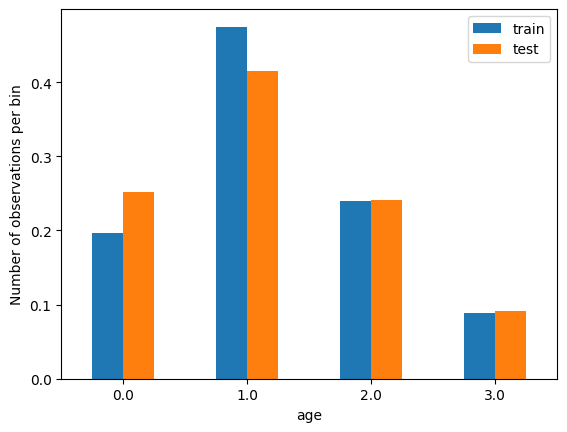

In [21]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

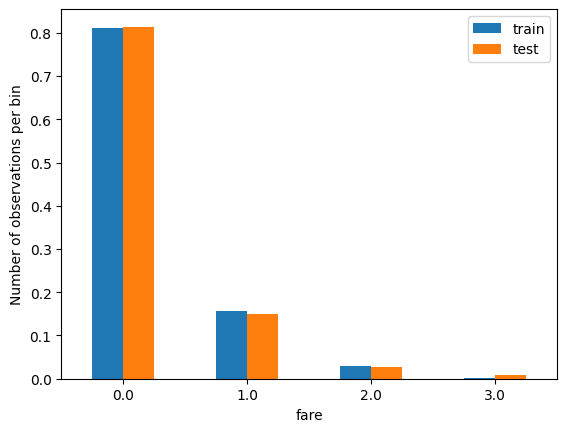

In [22]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')